<a href="https://colab.research.google.com/github/wynona-toby/Air-Quality-EDA/blob/main/Air_Quality_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Agenda For Data Set [Air Quality]**
1. **Data Introduction**: Overview of the air quality dataset and its features (pollutants, weather). Analyze pollution patterns across cities and identify factors contributing to higher pollution levels.
2. **Data Description & Summary**: Structure, statistics, missing data, and anomalies.
3. **Data Cleaning**: Handle missing values, convert data types, and preprocess.
4. **Data Visualization**: Explore distributions, trends, and correlations using plots.
5. **Overall Status**: Summarize key insights and pollutant levels by city.
6. **Conclusion**: Highlight actionable findings and next steps.

# **1. Data Introduction**

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Import Data
df = pd.read_csv("/content/global_air_quality_data_10000.csv")
print(df.head())

             City   Country        Date   PM2.5    PM10    NO2    SO2    CO  \
0         Bangkok  Thailand  2023-03-19   86.57   25.19  99.88  30.63  4.46   
1        Istanbul    Turkey  2023-02-16   50.63   97.39  48.14   8.71  3.40   
2  Rio de Janeiro    Brazil  2023-11-13  130.21   57.22  98.51   9.92  0.12   
3          Mumbai     India  2023-03-16  119.70  130.52  10.96  33.03  7.74   
4           Paris    France  2023-04-04   55.20   36.62  76.85  21.85  2.00   

       O3  Temperature  Humidity  Wind Speed  
0   36.29        17.67     59.35       13.76  
1  144.16         3.46     67.51        6.36  
2  179.31        25.29     29.30       12.87  
3   38.65        23.15     99.97        7.71  
4   67.09        16.02     90.28       14.16  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB


The Global Air Quality Data dataset contains 10,000 records of air quality measurements from major cities worldwide, offering valuable insights into various environmental indicators. Each entry includes data on pollutants such as PM2.5, PM10, NO2, SO2, CO, and O3, along with meteorological conditions like temperature, humidity, and wind speed.

Dataset Analysis :

No. of records : 10,000

No. of Attributes : 10

No of Independent variables : 10

# 1.1 Data Preprocessing and Cleaning

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)
# Check for duplicates
duplicates = df.duplicated().sum()
print(duplicates)

City           0
Country        0
Date           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed     0
dtype: int64
0


NO MISSING VALUE OR DUPLICATES

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Fill missing numerical data with mean values and ignore non-numeric column
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Check if missing values are filled
print("Missing Values After Filling:\n", df.isnull().sum())
print(df.head())


Missing Values After Filling:
 City           0
Country        0
Date           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed     0
dtype: int64
             City   Country       Date   PM2.5    PM10    NO2    SO2    CO  \
0         Bangkok  Thailand 2023-03-19   86.57   25.19  99.88  30.63  4.46   
1        Istanbul    Turkey 2023-02-16   50.63   97.39  48.14   8.71  3.40   
2  Rio de Janeiro    Brazil 2023-11-13  130.21   57.22  98.51   9.92  0.12   
3          Mumbai     India 2023-03-16  119.70  130.52  10.96  33.03  7.74   
4           Paris    France 2023-04-04   55.20   36.62  76.85  21.85  2.00   

       O3  Temperature  Humidity  Wind Speed  
0   36.29        17.67     59.35       13.76  
1  144.16         3.46     67.51        6.36  
2  179.31        25.29     29.30       12.87  
3   38.65        23.15     99.97        7.71  
4   67.09        16.02     90.28       14.16  


Dataset has been Cleaned and Preprocessed

# **2. Data Description and Summary**

# 2.1 Data Description

In [ ]:
print("Data Description:\n", df.describe())

Data Description:
                              Date         PM2.5          PM10           NO2  \
count                       10000  10000.000000  10000.000000  10000.000000   
mean   2023-06-29 00:28:56.640000     77.448439    104.438161     52.198649   
min           2023-01-01 00:00:00      5.020000     10.000000      5.010000   
25%           2023-03-28 00:00:00     41.185000     57.137500     28.347500   
50%           2023-06-27 00:00:00     77.725000    103.690000     52.100000   
75%           2023-09-27 00:00:00    113.392500    152.265000     75.705000   
max           2023-12-28 00:00:00    149.980000    200.000000    100.000000   
std                           NaN     41.927871     55.062396     27.320490   

                SO2            CO            O3  Temperature      Humidity  \
count  10000.000000  10000.000000  10000.000000  10000.00000  10000.000000   
mean      25.344490      5.047984    106.031643     14.89715     55.078579   
min        1.000000      0.100000  

# 2.2 Data Summary


This dataset contains air quality measurements across different cities
worldwide, focusing on various pollutants and weather conditions. The key attributes in the dataset are:

- City: Name of the city where the data was recorded.
- Country: The country of the city.
- Date: The date of air quality recording.
- PM2.5: Fine particulate matter smaller than 2.5 micrometers.
- PM10: Particulate matter smaller than 10 micrometers.
- NO2: Nitrogen dioxide concentration.
- SO2: Sulfur dioxide concentration.
- CO: Carbon monoxide concentration.
- O3: Ozone concentration.
- Temperature: Temperature in degrees Celsius.
- Humidity: Percentage of humidity.
- Wind Speed: Speed of wind in meters per second.


# **3. Data Analysis**

# 3.1 Grouping by Cities and getting average pollutant levels

In [ ]:
pollutant_means = df.groupby('City')[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']].mean()

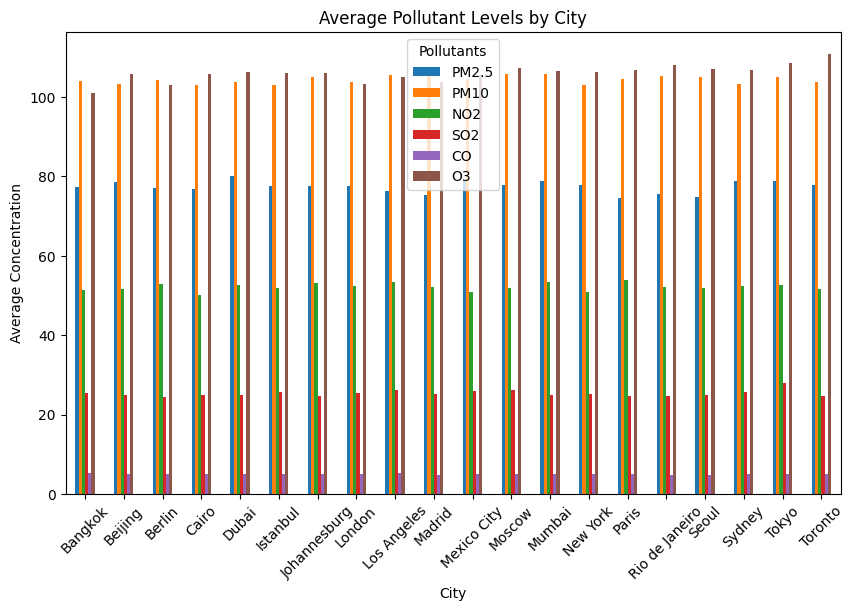

In [ ]:
pollutant_means.plot(kind='bar', figsize=(10, 6))
plt.title("Average Pollutant Levels by City")
plt.ylabel("Average Concentration")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.legend(title="Pollutants")
plt.show()

# 3.2 Correlation analysis between pollutants and environmental factors


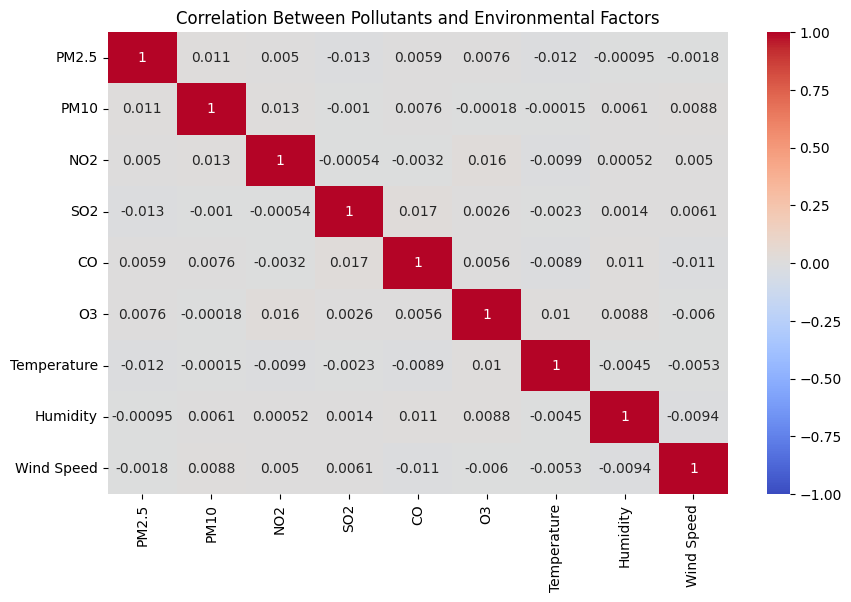

In [ ]:
numeric_columns = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature', 'Humidity', 'Wind Speed']
corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Between Pollutants and Environmental Factors")
plt.show()

# 3.3 Analysis of highest pollutant levels per city



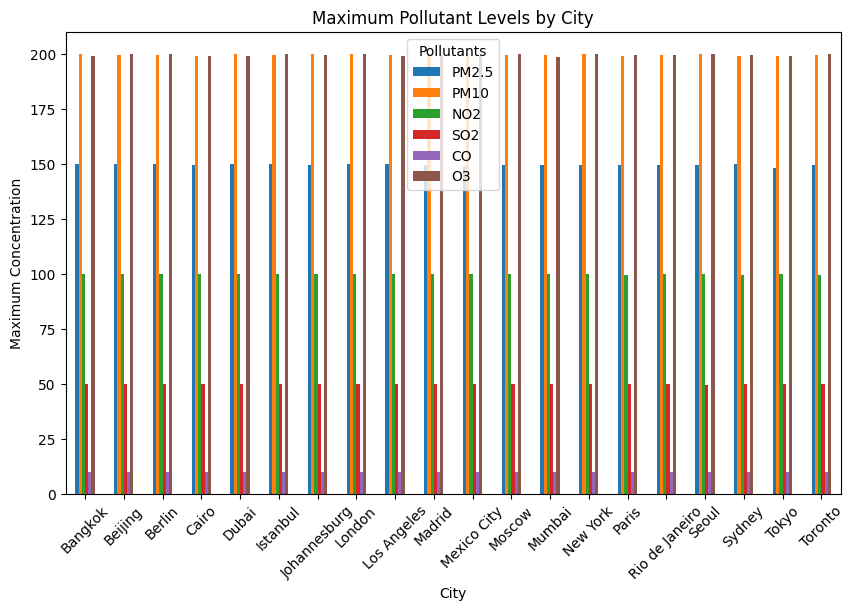

In [ ]:
max_pollutants = df.groupby('City')[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']].max()

max_pollutants.plot(kind='bar', figsize=(10, 6))
plt.title("Maximum Pollutant Levels by City")
plt.ylabel("Maximum Concentration")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.legend(title="Pollutants")
plt.show()

# CITY COMPARISONS

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
plt.style.use('ggplot')
columns_to_analyze = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature', 'Humidity', 'Wind Speed']

fig = go.Figure()

# Add histograms
for column in columns_to_analyze:
    fig.add_trace(go.Histogram(
        x=df[column],
        name=column,
        opacity=0.75,
        histnorm='density',
        marker=dict(line=dict(width=0.5)),
    ))

# Update layout
fig.update_layout(
    title='Distribution of Pollutants and Meteorological Data',
    xaxis_title='Value',
    yaxis_title='Density',
    barmode='overlay',
    bargap=0.1,
    template='plotly_white'
)

# Show the plot
fig.show()

# **4. Data Visualization**

# 4.1 Histogram for pollutant distribution

<Figure size 1000x600 with 0 Axes>

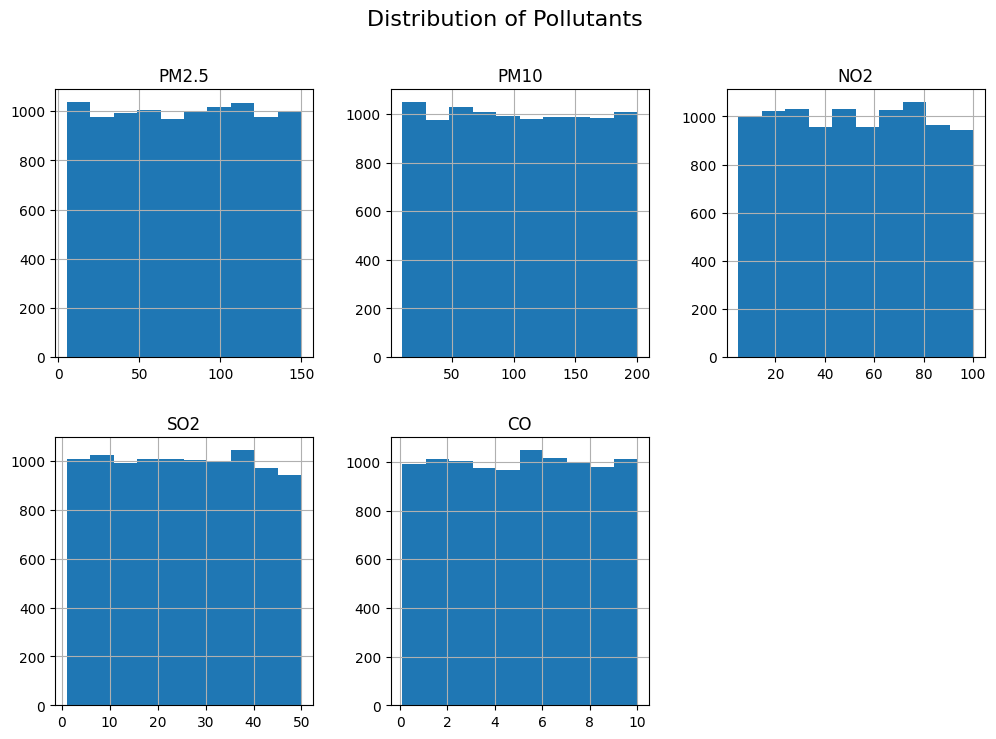

In [ ]:
plt.figure(figsize=(10, 6))
df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']].hist(bins=10, figsize=(12, 8), layout=(2, 3))
plt.suptitle('Distribution of Pollutants', fontsize=16)
plt.show()

# 4.2 Heatmap of correlations between pollutants and weather conditions

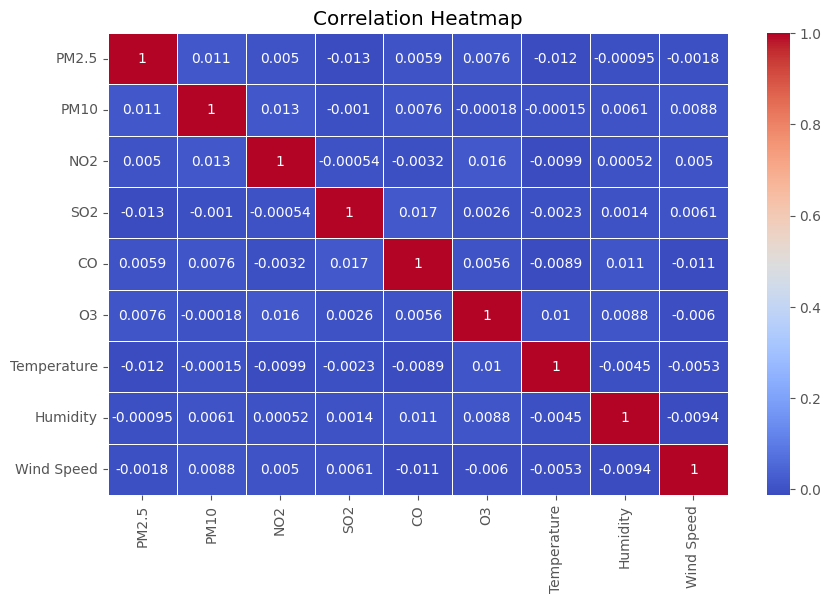

In [ ]:
plt.figure(figsize=(10, 6))
corr = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature', 'Humidity', 'Wind Speed']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# 4.3 Bar plot for average pollutant levels by city

<Figure size 1000x600 with 0 Axes>

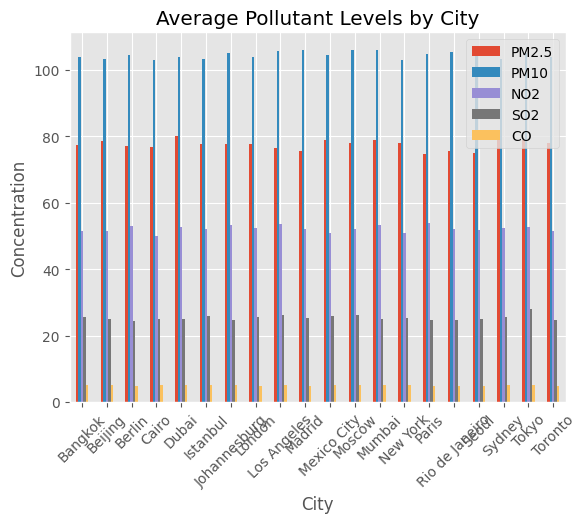

In [ ]:
pollutant_columns = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature', 'Humidity', 'Wind Speed']
df[pollutant_columns] = df[pollutant_columns].apply(pd.to_numeric, errors='coerce')
city_group = df.groupby('City')[pollutant_columns].mean()
plt.figure(figsize=(10, 6))
city_group[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']].plot(kind='bar')
plt.title('Average Pollutant Levels by City')
plt.ylabel('Concentration')
plt.xticks(rotation=45)
plt.show()

# 4.4 Scatterplot of NO2 vs PM2.5 Conc.

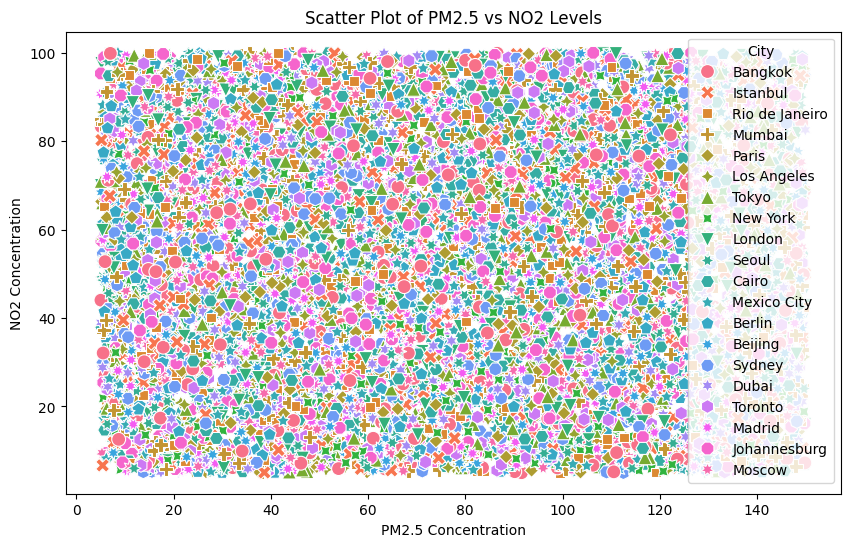

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PM2.5', y='NO2', hue='City', style='City', s=100)
plt.title('Scatter Plot of PM2.5 vs NO2 Levels')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('NO2 Concentration')
plt.legend(title='City')
plt.show()

# 4.5 BoxPlot of PM2.5 vs City



<ipython-input-26-6fbd70df4056>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




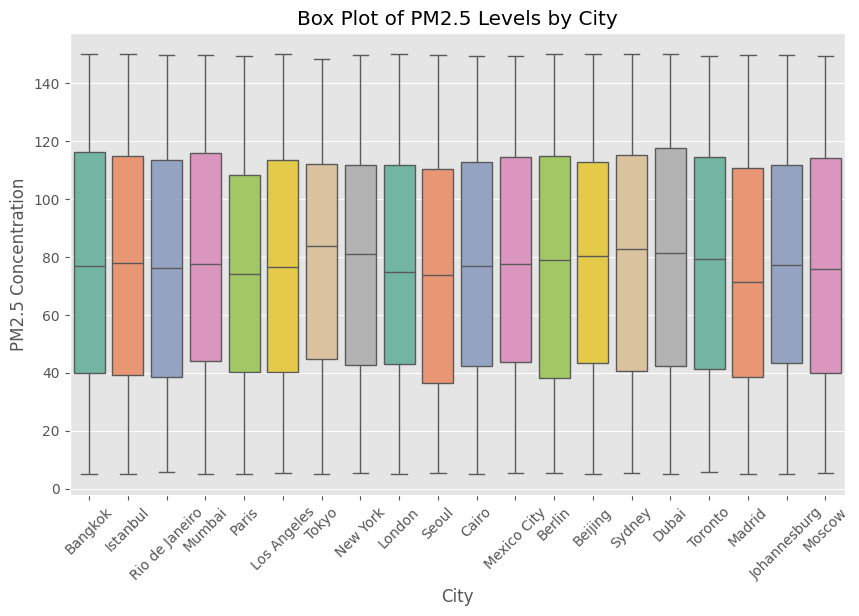

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='City', y='PM2.5', palette='Set2')
plt.title('Box Plot of PM2.5 Levels by City')
plt.ylabel('PM2.5 Concentration')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()

# **5. Summary and Conclusion**

# 5.1 Overal Summary

The analysis of the air quality dataset reveals critical insights into the pollutant levels across various cities. Using statistical and visual techniques, we were able to:

1. **Identify Pollution Levels**:
   - Average pollutant levels (PM2.5, PM10, NO2, SO2, CO) were calculated for each city, revealing significant disparities in air quality.
2. **Explore Relationships**:
   - Scatter plots were used to examine correlations between pollutants, such as PM2.5 and NO2, demonstrating that these pollutants often rise and fall together.
3. **Assess Environmental Factors**:
   - Correlations between pollutants and environmental factors like temperature and humidity were evaluated, revealing low correlations overall, suggesting other factors may influence pollution levels.


# 5.2 Conclusion

The findings underscore the urgent need for targeted air quality management and pollution control strategies, especially in cities with higher pollutant levels. Key conclusions drawn from the analysis include:

1. **High Pollution Levels**: Cities such as **Bangkok** and **Rio de Janeiro** face significant air quality challenges, particularly concerning PM2.5 and NO2 levels, which can have serious health impacts.

2. **Pollutant Relationships**: There is a notable correlation between certain pollutants, indicating that efforts to reduce one pollutant may positively affect others.

In summary, this analysis highlights the importance of ongoing monitoring and evaluation of air quality to mitigate health risks associated with air pollution and emphasizes the need for comprehensive strategies to combat pollution in urban areas.